#  Heart Disease Prediction 

This Dataset has Whether the Person affected by Heart Diseses or not 

# Importing Library

Before To starts with,I imported necessary libraries 

In [1]:


import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import cm
from IPython.display import Image 



# Import Dataset 

In [2]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# When Easy To UnderStand ALL Feature

1. age: The person's age in years
1. sex: The person's sex (1 = male, 0 = female)
1. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
1. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
1. chol: The person's cholesterol measurement in mg/dl
1. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
1. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
1. thalach: The person's maximum heart rate achieved
1. exang: Exercise induced angina (1 = yes; 0 = no)
1. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
1. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
1. ca: The number of major vessels (0-3)
1. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
1. target: Heart disease (0 = no, 1 = yes)

In [3]:
data.tail()  #last Five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.info() #about the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print("Shape of the Data:{}".format(data.shape)) #shape of the data

Shape of the Data:(303, 14)


# Missing Value 
Handling Missing Value is very Important in Machine Learning ,Because Algorithms Does Not Support  Missing Value to process it

In [6]:
#check any missing value in the data set
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In the Data set There is no missing value is present

# EDA (Exploratory Data Analysis)

In [7]:
for feature in data.columns:
    print("{} in Unique Values:{}".format(feature ,data[feature].nunique()))

age in Unique Values:41
sex in Unique Values:2
cp in Unique Values:4
trestbps in Unique Values:49
chol in Unique Values:152
fbs in Unique Values:2
restecg in Unique Values:3
thalach in Unique Values:91
exang in Unique Values:2
oldpeak in Unique Values:40
slope in Unique Values:3
ca in Unique Values:5
thal in Unique Values:4
target in Unique Values:2


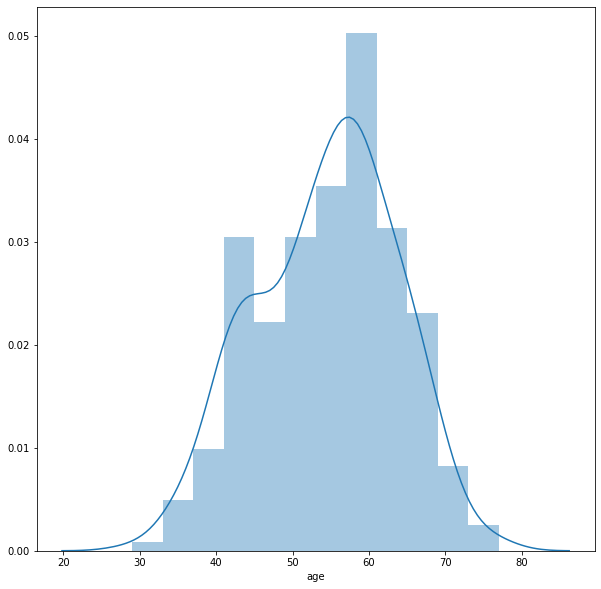

In [8]:
plt.figure(figsize = (10,10))
sns.distplot(data.age,kde = True)

First Check whether The  data is Balanced Dataset or Imbalance Dataset

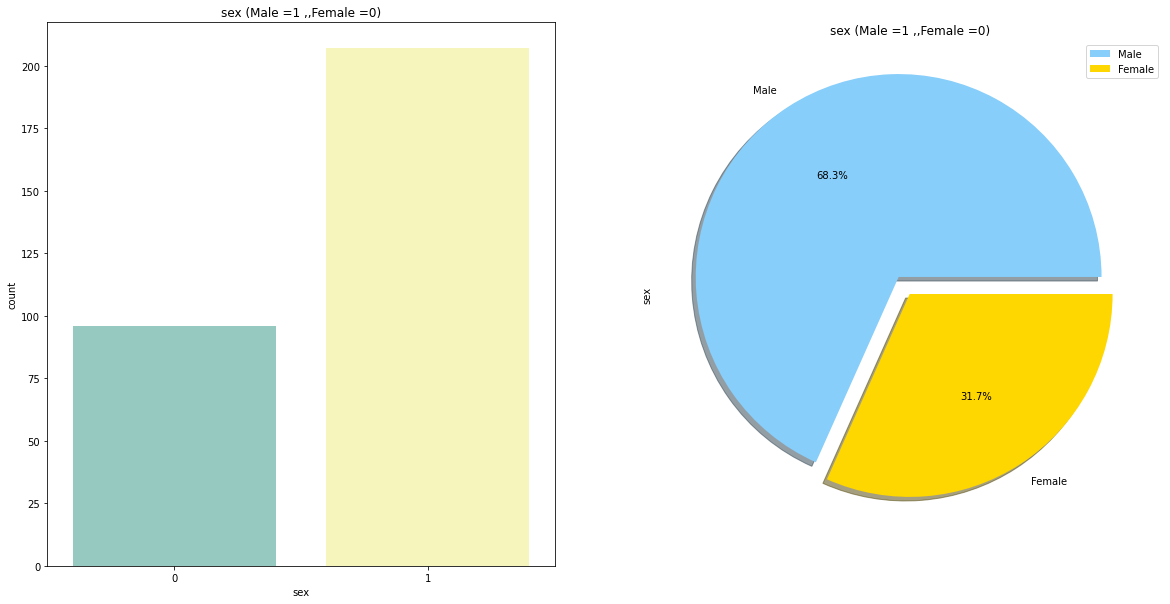

In [9]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="sex" ,data = data ,palette = "Set3" ,ax = ax[0])
ax[0].set_title("sex (Male =1 ,,Female =0)")
labels = ["Male" ,"Female"]
colors = ["lightskyblue" ,"gold"]
ax[1].set_title("sex (Male =1 ,,Female =0)")
data.sex.value_counts().plot.pie(explode = [0.1,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()


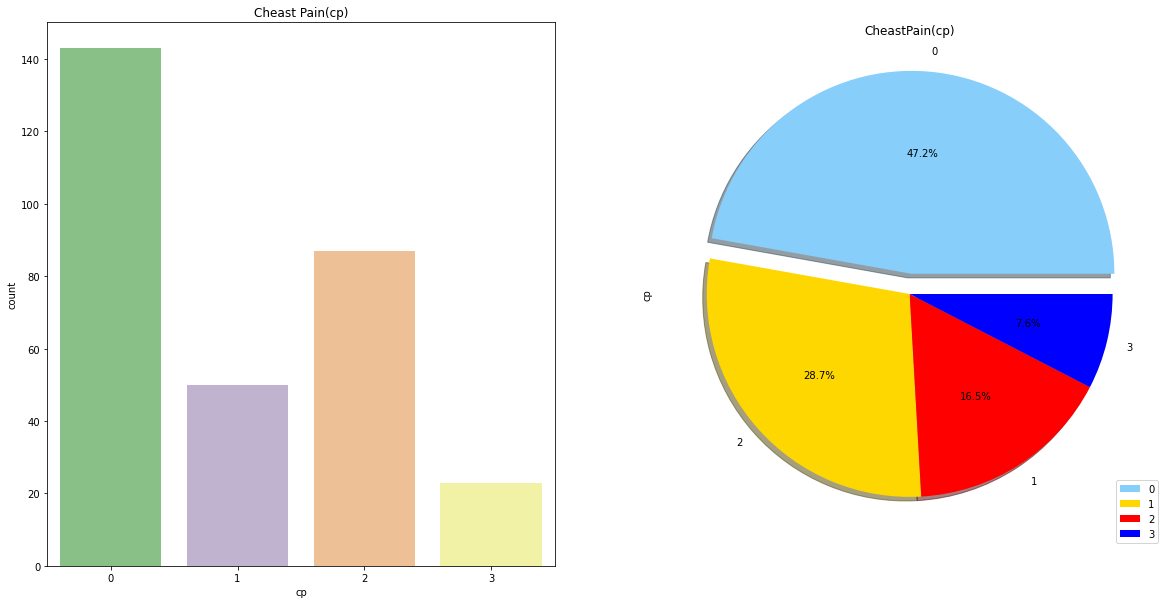

In [10]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="cp" ,data = data ,palette = "Accent" ,ax = ax[0])
ax[0].set_title("Cheast Pain(cp)")
ax[1].set_title("CheastPain(cp)")
colors = ["lightskyblue" ,"gold","red","blue"]
data.cp.value_counts().plot.pie(explode = [0.1,0,0,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1],colors = colors)
labels = ["0","1","2","3"]
ax[1].legend(labels ,loc = "lower right")

plt.show()

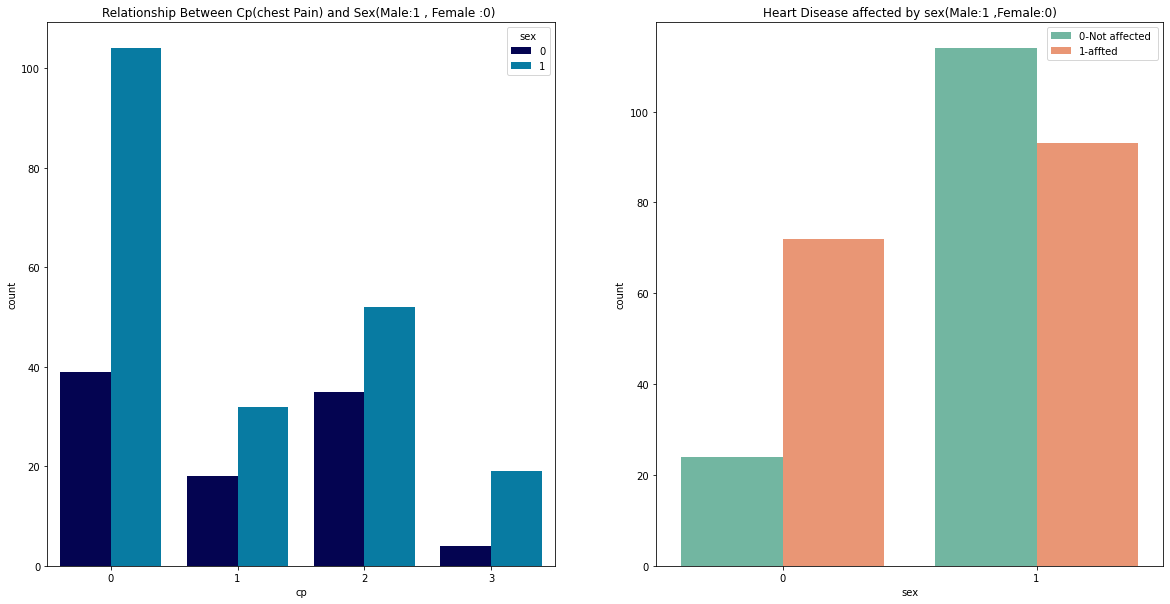

In [11]:
fig,ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x="cp" ,hue = "sex" ,orient = 'h' ,data = data ,saturation = 0.9,palette = "ocean",ax=ax[0])
ax[0].set_title("Relationship Between Cp(chest Pain) and Sex(Male:1 , Female :0) ")
sns.countplot(x = "sex" , data = data ,hue = "target" ,palette = "Set2" ,ax = ax[1])
ax[1].set_title("Heart Disease affected by sex(Male:1 ,Female:0)")
labels = ["0-Not affected ","1-affted"]
ax[1].legend(labels ,loc = "upper right")
plt.show()

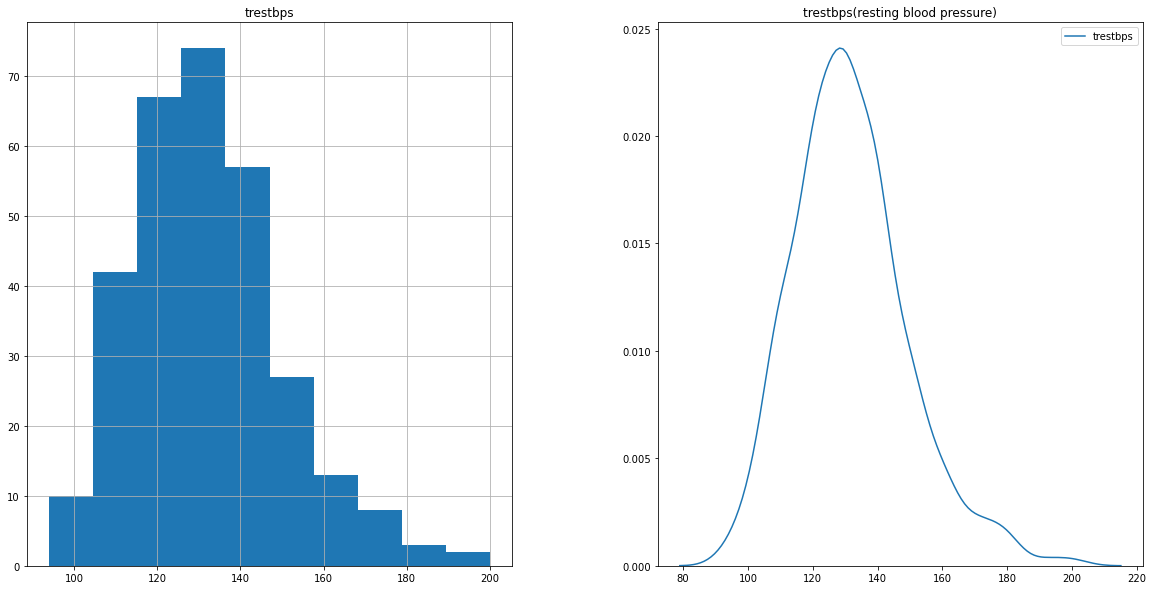

In [12]:
fig ,ax = plt.subplots(1,2,figsize=(20,10))
sns.kdeplot(data.trestbps ,ax =ax[1])
ax[0].set_title("trestbps(resting blood pressure")
data.hist(column = "trestbps",bins = 10 ,ax = ax[0])
ax[1].set_title("trestbps(resting blood pressure)")
plt.show()

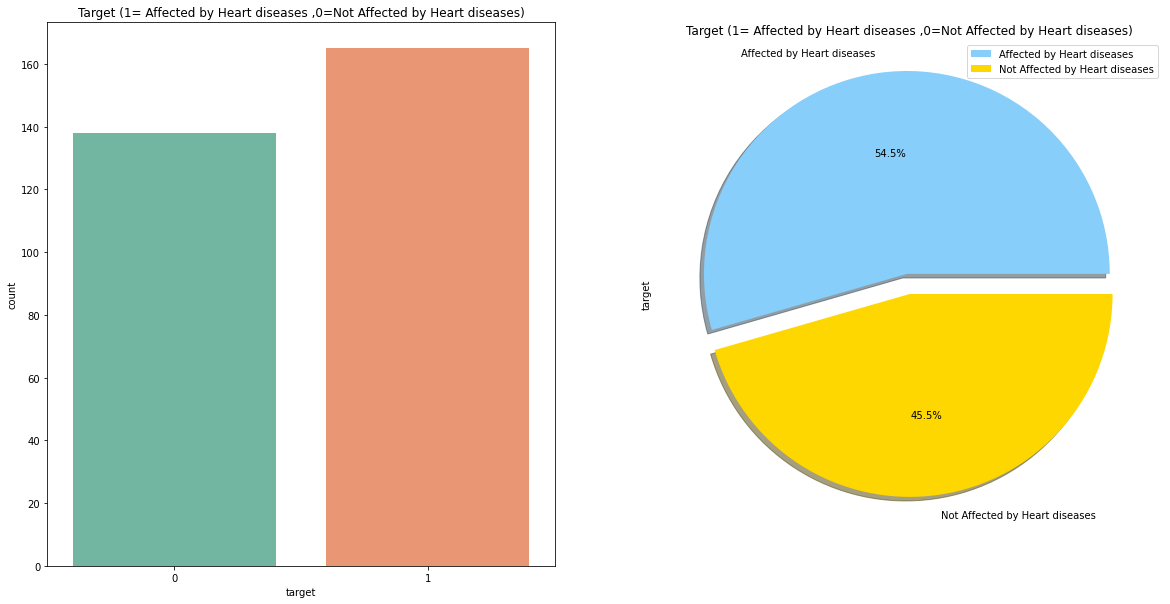

In [13]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="target" ,data = data ,palette = "Set2" ,ax = ax[0])
ax[0].set_title("Target (1= Affected by Heart diseases ,0=Not Affected by Heart diseases)")
labels = ["Affected by Heart diseases" ,"Not Affected by Heart diseases"]
colors = ["lightskyblue" ,"gold"]
ax[1].set_title("Target (1= Affected by Heart diseases ,0=Not Affected by Heart diseases)")
data.target.value_counts().plot.pie(explode = [0.1,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()

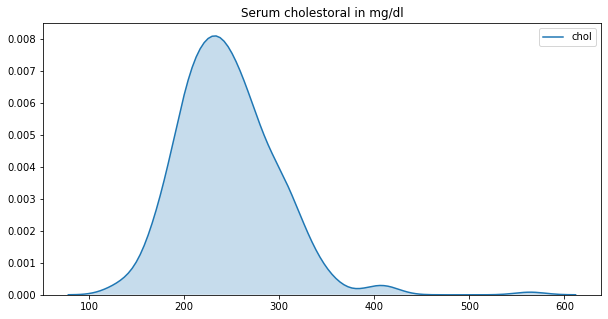

In [14]:
plt.figure(figsize=(10,5))
sns.kdeplot(data.chol,shade = True)
plt.title("Serum cholestoral in mg/dl")
plt.show()

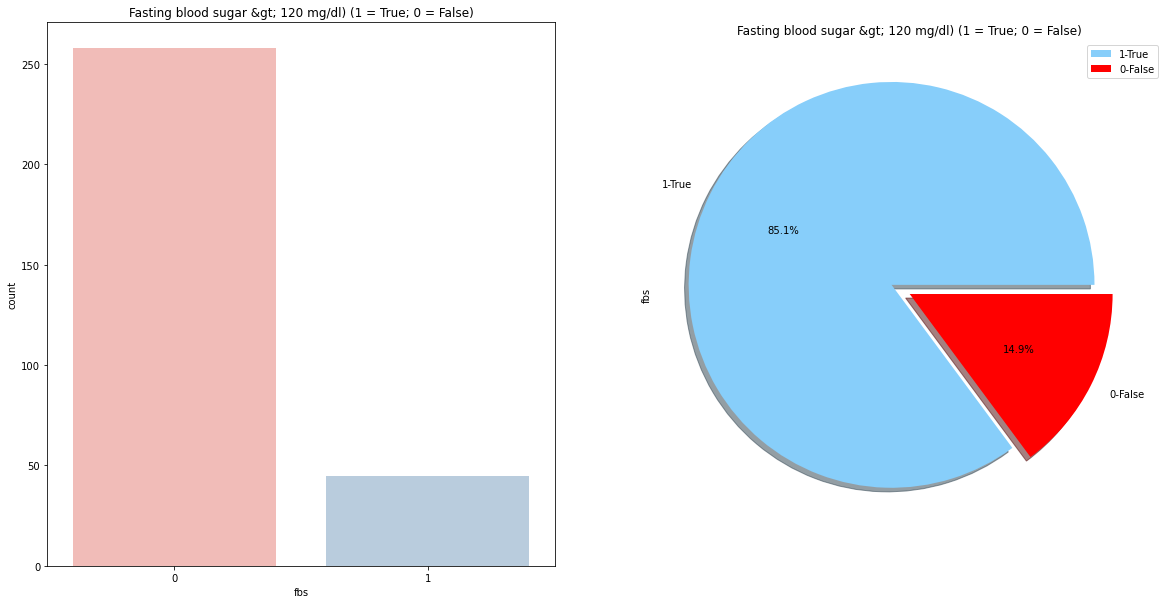

In [15]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="fbs" ,data = data ,palette = "Pastel1" ,ax = ax[0])
ax[0].set_title("Fasting blood sugar &gt; 120 mg/dl) (1 = True; 0 = False)")
labels = ["1-True" , "0-False"]
colors = ["lightskyblue" ,"red"]
ax[1].set_title("Fasting blood sugar &gt; 120 mg/dl) (1 = True; 0 = False)")
data.fbs.value_counts().plot.pie(explode = [0.1,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()

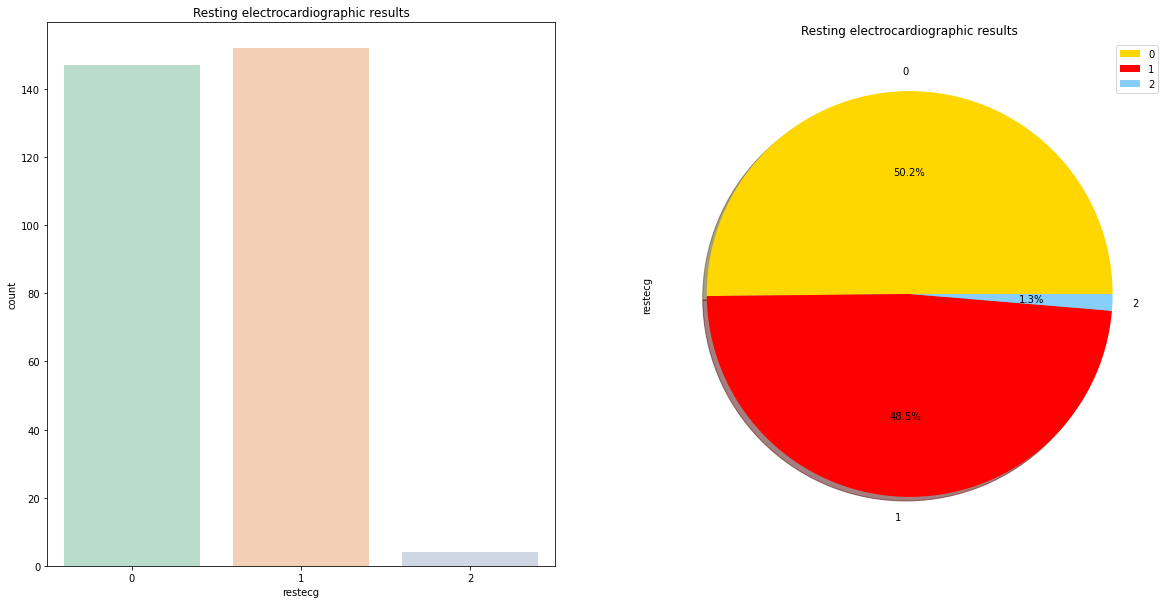

In [16]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="restecg" ,data = data ,palette = "Pastel2" ,ax = ax[0])
ax[0].set_title("Resting electrocardiographic results")
colors = ["gold" ,"red" ,"lightskyblue"]
ax[1].set_title("Resting electrocardiographic results")
labels =[0,1,2]
data.restecg.value_counts().plot.pie(explode = [0,0,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()

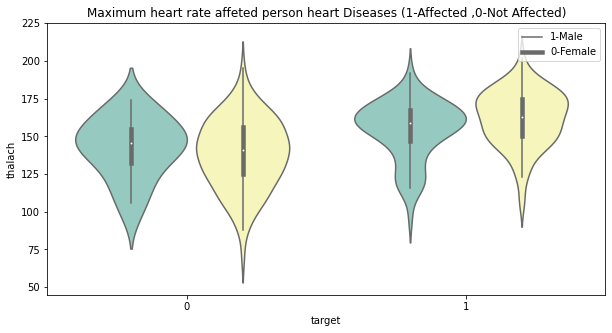

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(x="target", y ="thalach" ,hue ="sex" ,data = data,palette = "Set3")
plt.title("Maximum heart rate affeted person heart Diseases (1-Affected ,0-Not Affected)")
labels = ["1-Male" ,"0-Female"]
plt.legend(labels ,loc = "upper right")
plt.show()

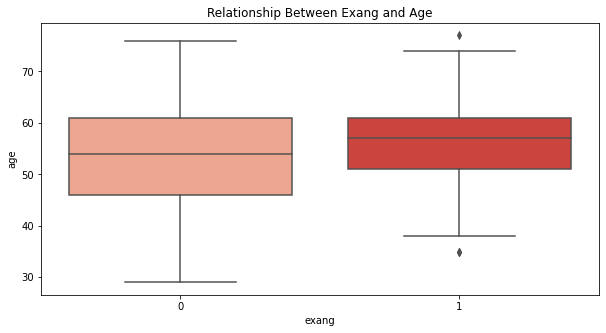

In [18]:
plt.figure(figsize =(10,5))
sns.boxplot(x="exang" ,y = "age" , data = data ,palette = "Reds")
plt.title("Relationship Between Exang and Age")
plt.show()


In [19]:
data.groupby("target")["oldpeak"].mean()

target
0    1.585507
1    0.583030
Name: oldpeak, dtype: float64

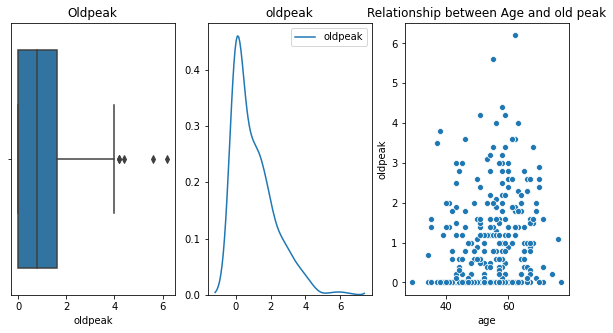

In [20]:
fig ,ax = plt.subplots(1,3,figsize = (10,5))
sns.boxplot(x = "oldpeak", data = data,ax=ax[0])
ax[0].set_title("Oldpeak")
sns.kdeplot(data.oldpeak ,ax = ax[1] )
ax[1].set_title("oldpeak")
sns.scatterplot(x= "age" , y = "oldpeak" ,data = data ,ax=ax[2])
ax[2].set_title("Relationship between Age and old peak")
plt.show()

In [21]:
def target(data ,feature):
    x = data.groupby(feature)["target"].sum()
    print("Feature {}:{}".format(feature ,x))

In [22]:
columns =["slope" ,"ca" ,"thal"]
for var in columns:
    target(data , var)

Feature slope:slope
0      9
1     49
2    107
Name: target, dtype: int64
Feature ca:ca
0    130
1     21
2      7
3      3
4      4
Name: target, dtype: int64
Feature thal:thal
0      1
1      6
2    130
3     28
Name: target, dtype: int64


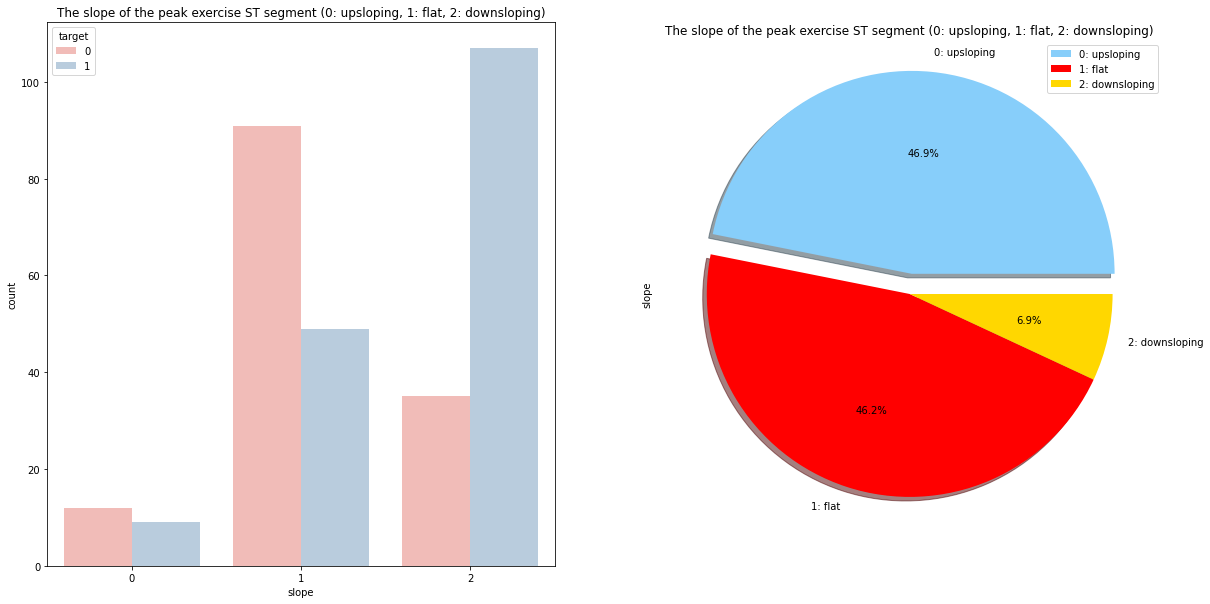

In [23]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="slope" ,data = data ,palette = "Pastel1",hue = "target" ,ax = ax[0] )
ax[0].set_title("The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)")
labels = [ "0: upsloping", "1: flat", "2: downsloping"]
colors = ["lightskyblue" ,"red" ,"gold"]
ax[1].set_title("The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)")
data.slope.value_counts().plot.pie(explode = [0.1,0,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()

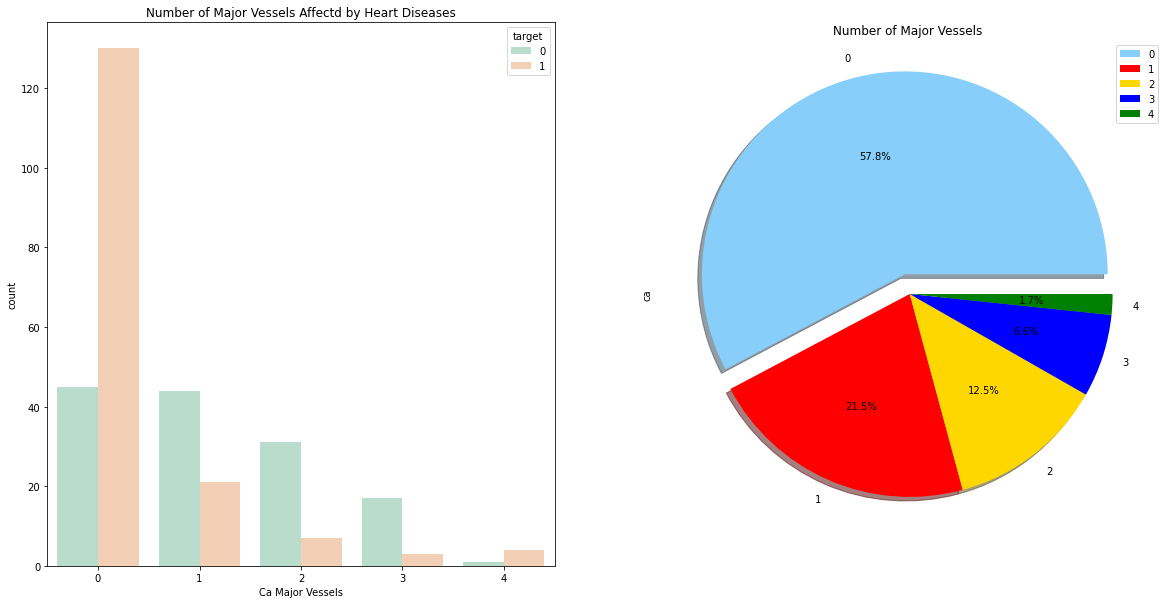

In [24]:
fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x="ca" ,data = data ,palette = "Pastel2",hue = "target" ,ax = ax[0] )
ax[0].set_title("Number of Major Vessels Affectd by Heart Diseases")
ax[0].set_xlabel("Ca Major Vessels")
labels = ["0","1","2","3" ,"4"]
colors = ["lightskyblue" ,"red" ,"gold" ,"blue" ,"green"]
ax[1].set_title("Number of Major Vessels ")
data.ca.value_counts().plot.pie(explode = [0.1,0,0,0,0] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()

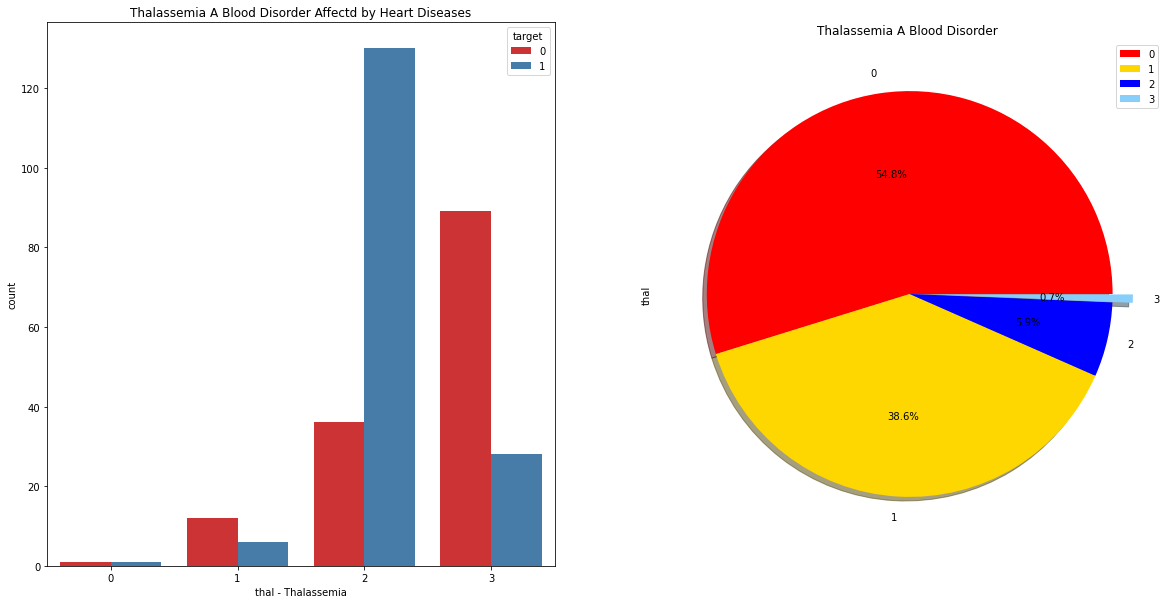

In [25]:

fig ,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x = "thal" ,data = data ,palette = "Set1",hue = "target" ,ax = ax[0] )
ax[0].set_title("Thalassemia A Blood Disorder Affectd by Heart Diseases")
ax[0].set_xlabel("thal - Thalassemia")
labels = ["0" ,"1" ,"2" ,"3"]
colors = ["red" ,"gold" ,"blue","lightskyblue"]
ax[1].set_title("Thalassemia A Blood Disorder ")
data.thal.value_counts().plot.pie(explode = [0,0,0 ,0.1] ,autopct="%1.1f%%" ,shadow = True,ax=ax[1] , labels = labels , colors = colors )
ax[1].legend(labels ,loc = "upper right")
plt.show()

# Outlier
An Outliers, being the most extreme observations,Oulier can affect the model perfomance,A good practice remove outlier gives a good result.

In [26]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

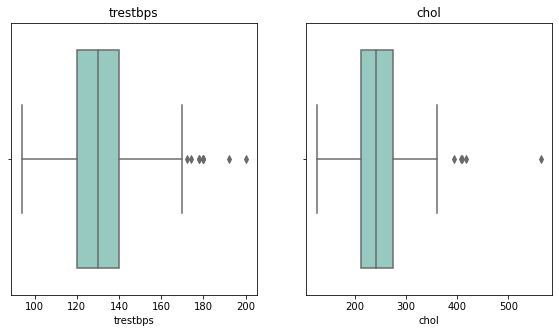

In [27]:
df = ["trestbps","chol"]
fig = plt.figure(figsize=(15,5))
for i ,var in zip(range(1,3),df):
    ax = fig.add_subplot(1,3,i)
    sns.boxplot(data[var] ,ax= ax ,palette = "Set3")
    plt.xlabel(var)
    plt.title(var)
plt.show()

    

We she some oulier is present The threstbps featue 99% of value present below 170 and same as feature chol 99% data present below 380 the other values are outlier so we take a IQR 

# IQR (Inter Quantile Range)

In [28]:

IQR = data["trestbps"].quantile(0.75) - data["trestbps"].quantile(0.25)
upper_boundary = data["trestbps"].quantile(0.75) + (1.5 * IQR)
Lower_boundary = data["trestbps"].quantile(0.25) - (1.5 * IQR)
print("IQR: {} upperBoundary:{} and Lowerboundary:{}".format(IQR , upper_boundary ,Lower_boundary))

IQR: 20.0 upperBoundary:170.0 and Lowerboundary:90.0


In [29]:
#chol feature
IQR = data["chol"].quantile(0.75) - data["trestbps"].quantile(0.25)
upper_boundary = data["chol"].quantile(0.75) + (1.5 * IQR)
Lower_boundary = data["chol"].quantile(0.25) - (1.5 * IQR)
print("IQR: {} upperBoundary:{} and Lowerboundary:{}".format(IQR , upper_boundary ,Lower_boundary))

IQR: 154.5 upperBoundary:506.25 and Lowerboundary:-20.75


In [30]:
data.loc[data["trestbps"] > 170 ,"trestbps" ] = 170
data.loc[data["chol"]>400 , "chol"] = 400

# Correlation

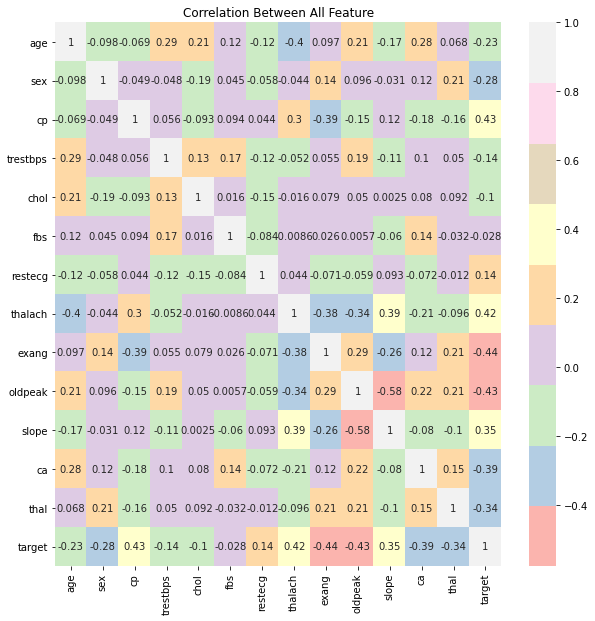

In [31]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr ,annot = True ,cmap = "Pastel1")
plt.title("Correlation Between All Feature")
plt.show()

A good practice to remove correlated variables during feature selection.In the data there is no one Feature in highly Correlated so we cannot remove any one feature

# Convert Some feature into categorical

In [32]:
df = data.copy()
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['thal'] = data['thal'].astype('object')

In [33]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

 The above feature are coverted into catagorical 

In [34]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# One Hot Encoding 

For the categorical varibles, we need to create dummy variables. I'm also going to drop the first category of each. For example, rather than having 'male' and 'female', we'll have 'male' with values of 0 or 1 (1 being male, and 0 therefore being female).

In [35]:
data = pd.get_dummies(data ,drop_first = True)

After Encoding Check Shape of Data 

In [36]:
data.shape

(303, 20)

# X-y split

In [37]:
x = data.drop(columns ="target" ,axis = 1)
y = data["target"]

In [38]:
print(x.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score ,recall_score ,roc_auc_score

# Spliting Model

When I spliting my data  80% Training and 20% Testing

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size =0.2 , random_state = 0)
print("Shape of Training  and  Testing")
print(x_train.shape ,x_test.shape)

Shape of Training  and  Testing
(242, 19) (61, 19)


# Normalizing  features

Before I train the Model first Normalizing the features 
Normalization Simply said the data feature range from 0 to 1

# Xnorm = X - Xmin / Xmax - Xmin

In [42]:
from sklearn.preprocessing import MinMaxScaler
x_train_std = MinMaxScaler().fit_transform(x_train)
x_test_std = MinMaxScaler().fit_transform(x_test)

# Algorithms used
1. LogisticRegression
1. RandomForestClassifier
1. DecisionTreeClassifier
1. SupportVectorClassifier
1. KNeighborsClassifier

In [43]:
model = {"LG":LogisticRegression() ,"RF":RandomForestClassifier() ,"DT": DecisionTreeClassifier() ,"svc":SVC()}

def create_modle(model ,x_train ,y_train ,x_test,y_test): 
    model_score_train = {}
    model_score_test = {}
    cnn = {}
    for name,model in model.items():
        np.random.seed(42)
        model.fit(x_train ,y_train) #fit model
        pred = model.predict(x_test)
        model_score_train[name] = model.score(x_train ,y_train)
        model_score_test[name] = model.score(x_test ,y_test)
        cnn[name] = confusion_matrix(y_test ,pred)
        
    return model_score_train,model_score_test,cnn
    

In [44]:
training_score = create_modle(model , x_train ,y_train ,x_test ,y_test)
train ,test,cnn = training_score

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
cnn

{'LG': array([[23,  4],
        [ 4, 30]]),
 'RF': array([[23,  4],
        [ 7, 27]]),
 'DT': array([[21,  6],
        [10, 24]]),
 'svc': array([[14, 13],
        [ 5, 29]])}

In [46]:
train

{'LG': 0.8636363636363636, 'RF': 1.0, 'DT': 1.0, 'svc': 0.6694214876033058}

In [47]:
test

{'LG': 0.8688524590163934,
 'RF': 0.819672131147541,
 'DT': 0.7377049180327869,
 'svc': 0.7049180327868853}

In [48]:
data1 = pd.DataFrame({"Train_score":train ,"Testing_score":test })
data1.head()

,Train_score,Testing_score
LG,0.863636,0.868852
RF,1.000000,0.819672
DT,1.000000,0.737705
svc,0.669421,0.704918


<Figure size 720x1440 with 0 Axes>

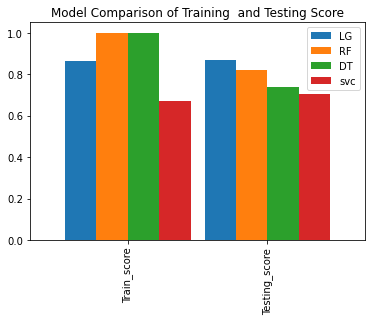

In [49]:
plt.figure(figsize=(10,20))
data1.T.plot.bar(width = 0.9)
plt.title("Model Comparison of Training  and Testing Score")
plt.show()

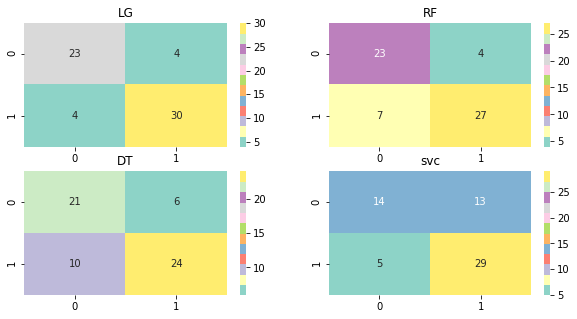

In [50]:
fig  = plt.figure(figsize=(10,5))
a =1
for key,name in cnn.items():
    ax = fig.add_subplot(2,2,a)
    plt.title(key)
    sns.heatmap(name ,annot =True , ax =ax ,cmap = "Set3")
    a = a+1
plt.show()

# Normalization

In [51]:
training_score_std = create_modle(model , x_train_std ,y_train ,x_test_std ,y_test)
train_std ,test_std,cnn_std = training_score_std

In [52]:
print("Training Score of After Normalization :{}".format(train_std))
print("Testing Score of After Normalization :{}".format(test_std))

Training Score of After Normalization :{'LG': 0.859504132231405, 'RF': 1.0, 'DT': 1.0, 'svc': 0.8801652892561983}
Testing Score of After Normalization :{'LG': 0.8852459016393442, 'RF': 0.8688524590163934, 'DT': 0.7868852459016393, 'svc': 0.8524590163934426}


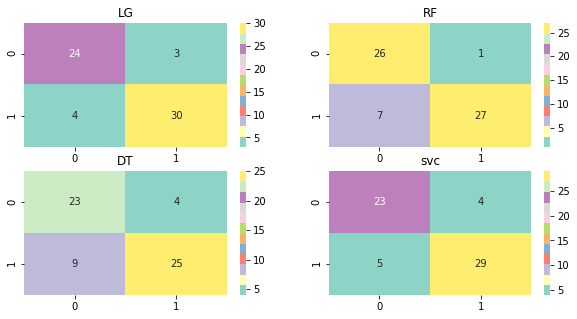

In [53]:
fig  = plt.figure(figsize=(10,5))
a =1
for key,name in cnn_std.items():
    ax = fig.add_subplot(2,2,a)
    plt.title(key)
    sns.heatmap(name ,annot =True , ax =ax ,cmap = "Set3")
    a = a+1
plt.show()

# Model HyperTuning

# Logistic Regression with HyperTuning using GridSearchCV

In [54]:
param = {"penalty": ["l1","l2" ,"elasticnet" ,"none"],    #Regularization paramater
         "C" : [0.1,0.001,0.1,1.0,1.5 ,3.0],             #strength of regularization
         "solver":["newton-cg", "lbfgs", "liblinear"],
         "multi_class":['auto', 'ovr', "multinomial"],
         "max_iter" :[10,20,30,50,100]
        }

In [55]:
LG_H = LogisticRegression()
Grid_lg = GridSearchCV(LG_H , param_grid = param ,cv = 5 , scoring = 'accuracy' ,n_jobs = -1).fit(x_train_std,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [56]:
Grid_lg.best_params_

{'C': 3.0,
 'max_iter': 10,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

Accuracy_score of Logistic Regression:85.0
RecallScore(Positive Prediction,Low False Negative Rate):82.0
PrecisionScore(Low false Postitive rate):90.0


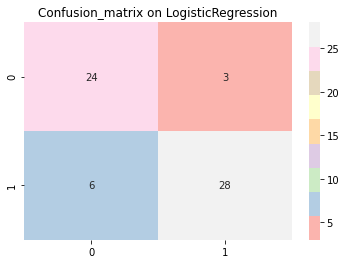

In [57]:
Grid_best_est = Grid_lg.best_estimator_
LG_Gr_pred = Grid_best_est.predict(x_test_std)
Lg_accuracy = accuracy_score(y_test , LG_Gr_pred)
Lg_precision = precision_score(y_test , LG_Gr_pred)
Lg_recall = recall_score(y_test ,LG_Gr_pred)
Lg_conf = confusion_matrix(y_test , LG_Gr_pred)
print("Accuracy_score of Logistic Regression:{}".format(round(Lg_accuracy * 100)))
print("RecallScore(Positive Prediction,Low False Negative Rate):{}".format(round(Lg_recall*100)))
print("PrecisionScore(Low false Postitive rate):{}".format(round(Lg_precision *100)))
sns.heatmap(Lg_conf ,annot = True , cmap = "Pastel1")
plt.title("Confusion_matrix on LogisticRegression")
plt.show()

# Support Vector Classifier HyperTuning

In [58]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']  # what type of algorithm is used
C = [0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000] 
gamma = [0.001, 0.01, 0.1, 0.5, 1]     #this parem used for Rbf
degree =[1,2,3,4]                     #used for polmonial algorithm
param = {'kernel':kernel , #
         "gamma":gamma,
         "degree": degree,
            "C" :C}



In [59]:
svc = SVC()
svc_grid = GridSearchCV(svc , param_grid = param ,scoring = "accuracy" ,n_jobs = -1 ,verbose = 2 ,cv = 10).fit(x_train_std,y_train)

Fitting 10 folds for each of 1040 candidates, totalling 10400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 9300 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 10344 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 10400 out of 10400 | elapsed:  1.1min finished


In [60]:
svc_grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}

Accuracy_score of Support Vector Classifier:85.0
RecallScore(Positive Prediction,Low False Negative Rate):82.0
PrecisionScore(Low false Postitive rate):90.0


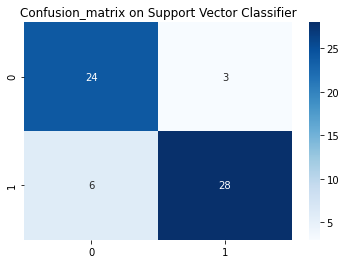

In [61]:
svc_est = svc_grid.best_estimator_
svc_Gr_pred = Grid_best_est.predict(x_test_std)
svc_accuracy = accuracy_score(y_test , svc_Gr_pred)
svc_precision = precision_score(y_test , svc_Gr_pred)
svc_recall = recall_score(y_test ,svc_Gr_pred)
svc_conf = confusion_matrix(y_test , svc_Gr_pred)
print("Accuracy_score of Support Vector Classifier:{}".format(round(svc_accuracy * 100)))
print("RecallScore(Positive Prediction,Low False Negative Rate):{}".format(round(svc_recall*100)))
print("PrecisionScore(Low false Postitive rate):{}".format(round(svc_precision *100)))
sns.heatmap(Lg_conf ,annot = True , cmap = "Blues")
plt.title("Confusion_matrix on Support Vector Classifier")
plt.show()


# Kneighbors Classifier

In [62]:
neighbour = [i for i in range(1,30)]
print(neighbour ,end = " ")
train_score,test_score =[] ,[]
for n in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train ,y_train)
    train_score.append(knn.score(x_train ,y_train))
    test_score.append(knn.score(x_test ,y_test))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] 

In [63]:
test_score

[0.5409836065573771,
 0.5573770491803278,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7049180327868853,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853]

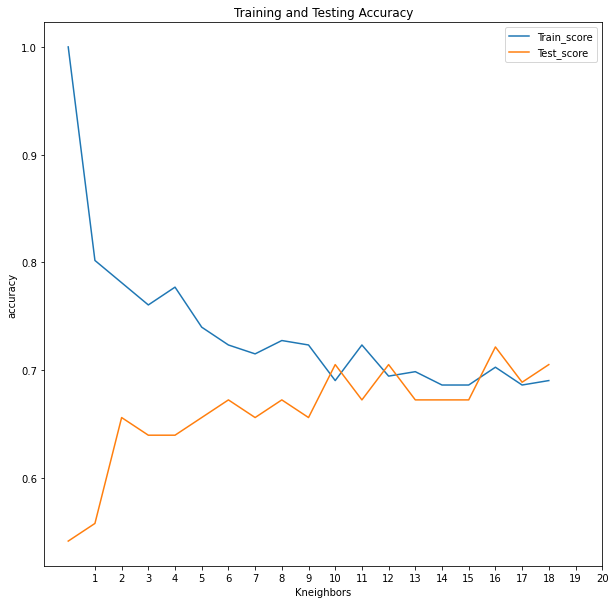

In [64]:
plt.figure(figsize = (10,10))
plt.plot(train_score)
plt.plot(test_score)
plt.title("Training and Testing Accuracy")
plt.xlabel("Kneighbors")
plt.ylabel("accuracy")
plt.xticks(range(1,21))
plt.legend(labels=["Train_score" ,"Test_score"] ,loc = "upper right")
plt.show()

# Decision Tree Classifier HyperTuning using RandomizedCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parem ={"criterion" : ['gini', 'entropy'] ,
       "splitter":['best', 'random'] ,
        "max_depth" : [int(x) for x in np.linspace(1, 1000,500)],
        'min_samples_split': [2, 5, 10,14],
        'min_samples_leaf' :[1, 2, 4,6,8]
       }
DT = DecisionTreeClassifier()
Randomized = RandomizedSearchCV(estimator=DT,param_distributions=parem,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
Randomized.fit(x_train ,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 59, ...],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [66]:
Randomized.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 487,
 'criterion': 'gini'}

In [67]:
Best_estimater = Randomized.best_estimator_

Accuracy_score for Decision Tree:0.7540983606557377


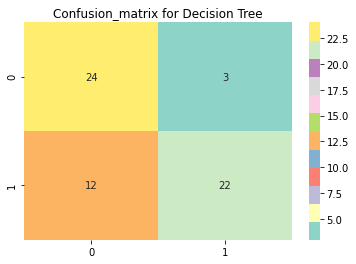

In [68]:
pred = Best_estimater.predict(x_test)
y_pred = Best_estimater.predict_proba(x_test)[:, 1]
Confusion_Dt = confusion_matrix(y_test ,pred)
print("Accuracy_score for Decision Tree:{}".format(accuracy_score(y_test ,pred)))
sns.heatmap(Confusion_Dt , annot = True ,cmap = "Set3")
plt.title("Confusion_matrix for Decision Tree")
plt.show()

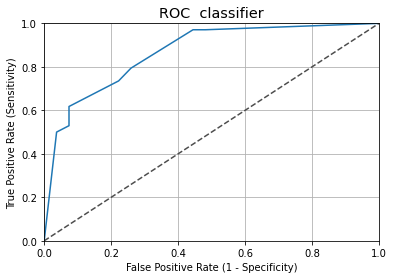

In [69]:
from sklearn.metrics import roc_curve
False_positive_rate, True_pos_rate, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
plt.plot(False_positive_rate ,True_pos_rate)
plt.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC  classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Decision Tree Classifier with HyperTuning using GridSearchCV

In [70]:
DT = DecisionTreeClassifier()
parem ={"criterion" : ['gini', 'entropy'] ,
       "splitter":['best', 'random'] ,
        "max_depth" : [int(x) for x in np.linspace(1, 100,50)],
        'min_samples_split': [2, 5, 10,14],
        'min_samples_leaf' :[1, 2, 4,6,8]
       }

In [71]:
GS_T = GridSearchCV(estimator = DT , param_grid = parem , scoring = "accuracy" ,n_jobs = -1 ,cv = 5  ).fit(x_train ,y_train)

In [72]:
GS_T.best_params_

{'criterion': 'gini',
 'max_depth': 57,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'splitter': 'random'}

Accuracy_score of Decision Tree Classifier:75.0
RecallScore(Positive Prediction,Low False Negative Rate):74.0
PrecisionScore(Low false Postitive rate):81.0


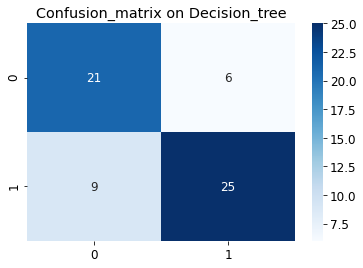

In [73]:
GSVT = GS_T.best_estimator_
dpred = GSVT.predict(x_test)
d_con = confusion_matrix(y_test ,dpred)
d_precision = precision_score(y_test ,dpred)
d_Recall = recall_score(y_test ,dpred)
d_accuracy = accuracy_score(y_test , dpred) 
print("Accuracy_score of Decision Tree Classifier:{}".format(round(d_accuracy * 100)))
print("RecallScore(Positive Prediction,Low False Negative Rate):{}".format(round(d_Recall*100)))
print("PrecisionScore(Low false Postitive rate):{}".format(round(d_precision *100)))
sns.heatmap(d_con ,annot = True , cmap = "Blues")
plt.title("Confusion_matrix on Decision_tree")
plt.show()


# Random Forest Classifier Hyper Tuning

In [74]:
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 1000)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(1, 1000,500)]
min_samples_split = [2, 5, 10,14,15]
min_samples_leaf = [1, 2, 4,6,8,10,12]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
RF=RandomForestClassifier()
Rf_tuning=RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
Rf_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 59, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12],
                                        'min_samples_split': [2, 5, 10, 14, 15],
                                        'n_estimators': [2, 4, 6, 

In [75]:
Rf_tuning.best_params_

{'n_estimators': 1906,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 465,
 'criterion': 'entropy'}

In [76]:
rf = Rf_tuning.best_estimator_

Accuracy_score for Random Forest Classifier:0.8524590163934426
RecallScore(Positive Prediction,Low False Negative Rate):88.0
PrecisionScore(Low false Postitive rate):86.0


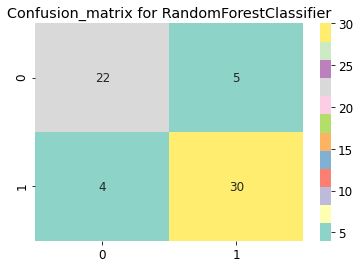

In [78]:
RF_pred = rf.predict(x_test)
Confusion_Dt = confusion_matrix(y_test ,RF_pred)
pre = precision_score(y_test ,RF_pred)
Recall = recall_score(y_test ,RF_pred)
print("Accuracy_score for Random Forest Classifier:{}".format(accuracy_score(y_test ,RF_pred)))
print("RecallScore(Positive Prediction,Low False Negative Rate):{}".format(round(Recall*100)))
print("PrecisionScore(Low false Postitive rate):{}".format(round(pre *100)))
sns.heatmap(Confusion_Dt , annot = True ,cmap = "Set3")
plt.title("Confusion_matrix for RandomForestClassifier")
plt.show()